<a href="https://colab.research.google.com/github/DanielFirman/case_hiv/blob/main/kasushiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('kasushiv.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1617 non-null   int64 
 1   kode_provinsi        1617 non-null   int64 
 2   nama_provinsi        1617 non-null   object
 3   kode_kabupaten_kota  1617 non-null   int64 
 4   nama_kabupaten_kota  1617 non-null   object
 5   kelompok_umur        1617 non-null   object
 6   jenis_kelamin        1617 non-null   object
 7   jumlah_kasus         1617 non-null   int64 
 8   satuan               1617 non-null   object
 9   tahun                1617 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 126.5+ KB


In [ ]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_umur,jenis_kelamin,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,LAKI-LAKI,4,ORANG,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-4,PEREMPUAN,7,ORANG,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,LAKI-LAKI,3,ORANG,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,5-14,PEREMPUAN,0,ORANG,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,15-19,LAKI-LAKI,8,ORANG,2019


In [ ]:
df.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
kelompok_umur          0
jenis_kelamin          0
jumlah_kasus           0
satuan                 0
tahun                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_kasus,tahun
count,1617.000000,1617.0,1617.000000,1617.000000,1617.000000
mean,809.000000,32.0,3231.246753,19.781076,2020.998145
std,466.932008,0.0,31.175550,48.476725,1.414869
min,1.000000,32.0,3201.000000,0.000000,2019.000000
25%,405.000000,32.0,3207.000000,0.000000,2020.000000
50%,809.000000,32.0,3214.000000,3.000000,2021.000000
75%,1213.000000,32.0,3273.000000,15.000000,2022.000000
max,1617.000000,32.0,3279.000000,633.000000,2023.000000


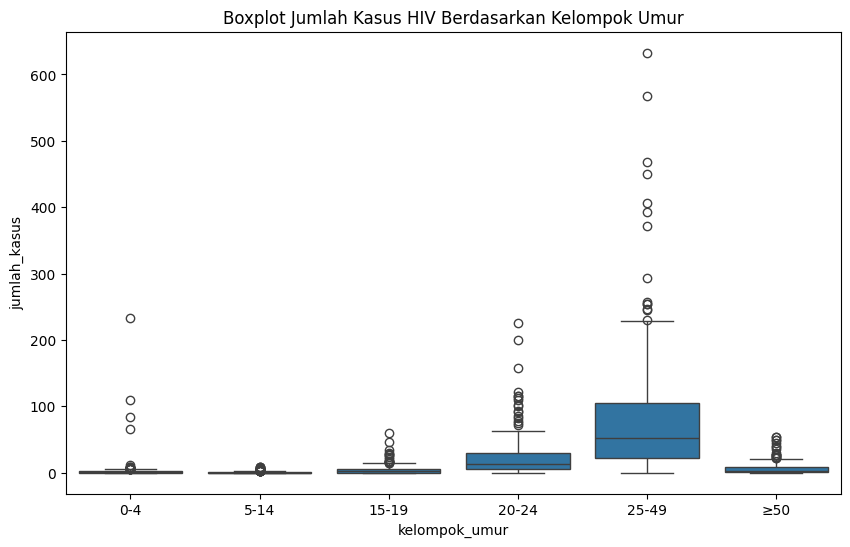

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='kelompok_umur', y='jumlah_kasus', data=df)
plt.title('Boxplot Jumlah Kasus HIV Berdasarkan Kelompok Umur')
plt.show()

In [ ]:
# nilai unik dalam kolom kategori
print(df['kelompok_umur'].unique())
print(df['nama_kabupaten_kota'].unique())


['0-4' '5-14' '15-19' '20-24' '25-49' '≥50']
['KABUPATEN BOGOR' 'KABUPATEN SUKABUMI' 'KABUPATEN CIANJUR'
 'KABUPATEN BANDUNG' 'KABUPATEN GARUT' 'KABUPATEN TASIKMALAYA'
 'KABUPATEN CIAMIS' 'KABUPATEN KUNINGAN' 'KABUPATEN CIREBON'
 'KABUPATEN MAJALENGKA' 'KABUPATEN SUMEDANG' 'KABUPATEN INDRAMAYU'
 'KABUPATEN SUBANG' 'KABUPATEN PURWAKARTA' 'KABUPATEN KARAWANG'
 'KABUPATEN BEKASI' 'KABUPATEN BANDUNG BARAT' 'KABUPATEN PANGANDARAN'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA BANDUNG' 'KOTA CIREBON' 'KOTA BEKASI'
 'KOTA DEPOK' 'KOTA CIMAHI' 'KOTA TASIKMALAYA' 'KOTA BANJAR']


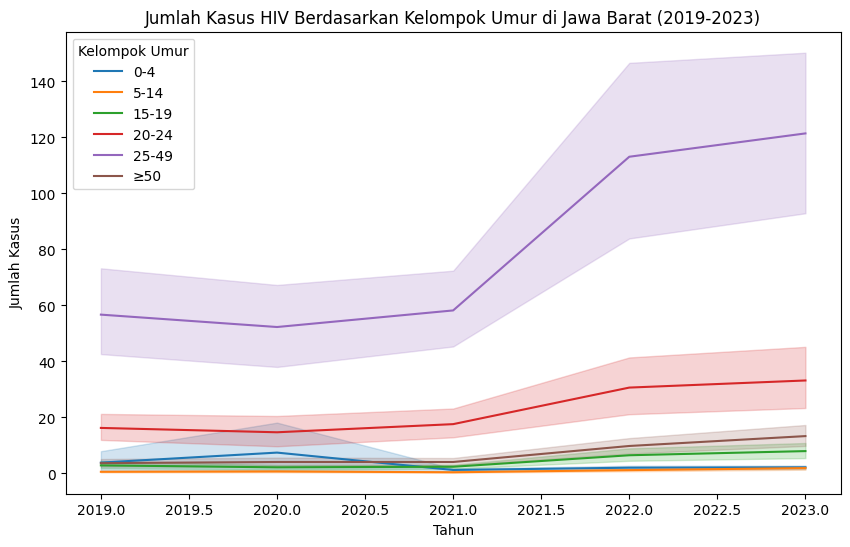

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='tahun', y='jumlah_kasus', hue='kelompok_umur')
plt.title('Jumlah Kasus HIV Berdasarkan Kelompok Umur di Jawa Barat (2019-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Kelompok Umur')
plt.show()


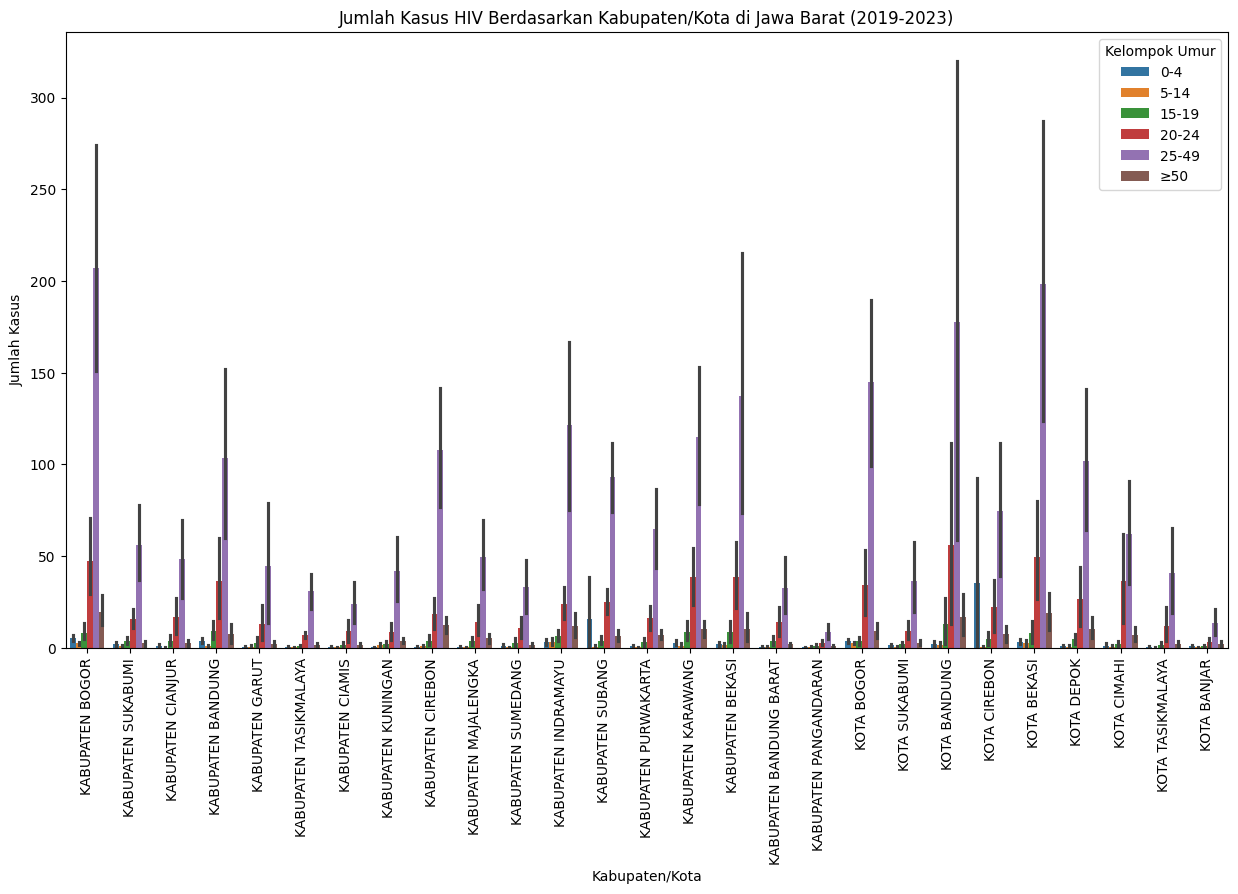

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='nama_kabupaten_kota', y='jumlah_kasus', hue='kelompok_umur')
plt.title('Jumlah Kasus HIV Berdasarkan Kabupaten/Kota di Jawa Barat (2019-2023)')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=90)
plt.legend(title='Kelompok Umur')
plt.show()


In [ ]:
total_kasus_per_kabupaten = df.groupby('nama_kabupaten_kota')['jumlah_kasus'].sum().reset_index()

sorted_kasus = total_kasus_per_kabupaten.sort_values(by='jumlah_kasus', ascending=False)

top_3_kabupaten = sorted_kasus.head(3)
print("3 Kabupaten/Kota dengan jumlah kasus terbanyak:")
print(top_3_kabupaten)


3 Kabupaten/Kota dengan jumlah kasus terbanyak:
   nama_kabupaten_kota  jumlah_kasus
3      KABUPATEN BOGOR          2903
20         KOTA BEKASI          2810
18        KOTA BANDUNG          2676


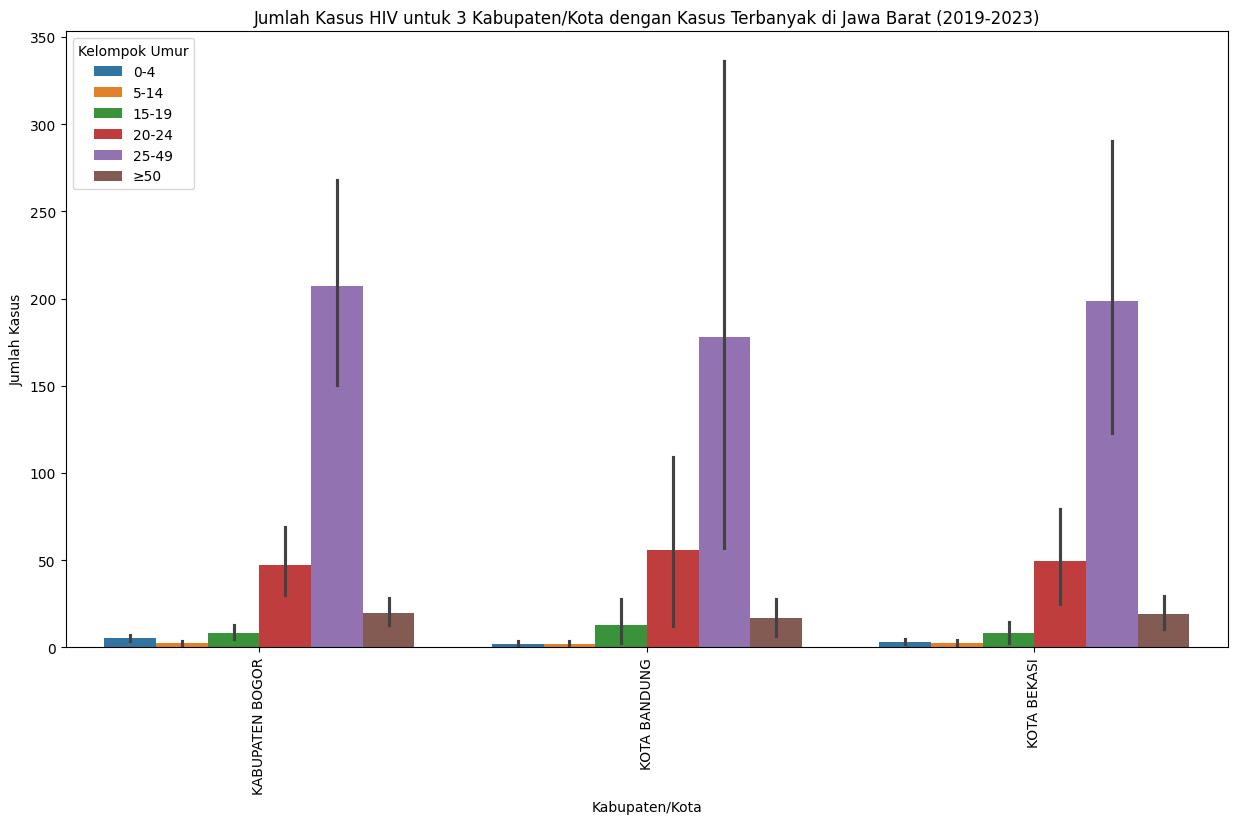

In [ ]:
top_3_names = top_3_kabupaten['nama_kabupaten_kota']
filtered_df = df[df['nama_kabupaten_kota'].isin(top_3_names)]

plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_df, x='nama_kabupaten_kota', y='jumlah_kasus', hue='kelompok_umur')
plt.title('Jumlah Kasus HIV untuk 3 Kabupaten/Kota dengan Kasus Terbanyak di Jawa Barat (2019-2023)')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=90)
plt.legend(title='Kelompok Umur')
plt.show()

In [ ]:
top_3_kabupaten = sorted_kasus.head(3)
top_3_names = top_3_kabupaten['nama_kabupaten_kota']

# Filter data untuk hanya menyertakan 3 kabupaten/kota dengan jumlah kasus terbanyak
filtered_df = df[df['nama_kabupaten_kota'].isin(top_3_names)]

# Kelompokkan data berdasarkan tahun dan kabupaten/kota, lalu jumlahkan jumlah_kasus
yearly_data = filtered_df.groupby(['tahun', 'nama_kabupaten_kota'])['jumlah_kasus'].sum().reset_index()

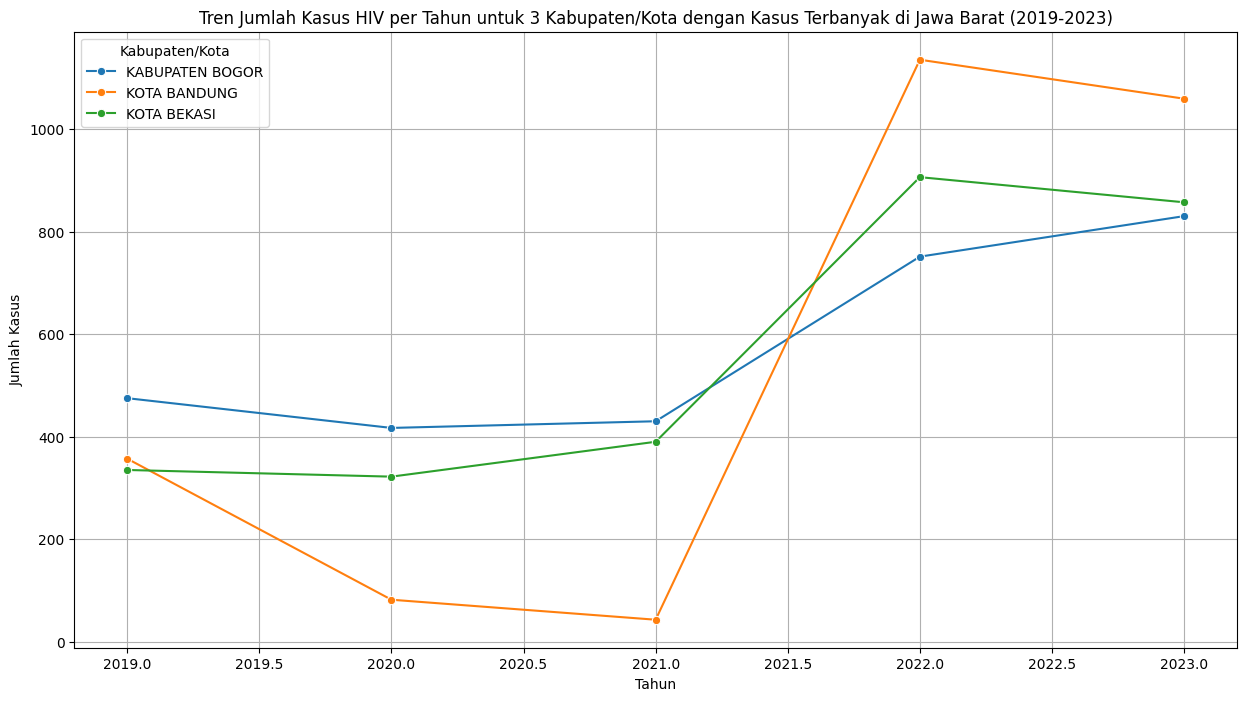

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_data, x='tahun', y='jumlah_kasus', hue='nama_kabupaten_kota', marker='o')
plt.title('Tren Jumlah Kasus HIV per Tahun untuk 3 Kabupaten/Kota dengan Kasus Terbanyak di Jawa Barat (2019-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Kabupaten/Kota')
plt.grid(True)
plt.show()
